In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from scipy import stats

sns.set(
        font_scale=2,
        style="whitegrid",
        rc={'figure.figsize':(20,7)}
        )

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/385916/experiment_lesson_4.csv')

In [26]:
df

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


In [28]:
control = df.query('experiment_group == "control"')

In [29]:
control

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
10087,2708,23.0,Central,control
10088,3918,45.0,Central,control
10089,9544,41.0,Suburb,control
10090,1101,38.0,Central,control


In [30]:
test = df.query('experiment_group == "test"')

In [31]:
test

,order_id,delivery_time,district,experiment_group
10092,12494,38.0,Purlieus,test
10093,12136,31.0,Purlieus,test
10094,11987,39.0,Purlieus,test
10095,12848,29.0,Central,test
10096,13166,31.0,Purlieus,test
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

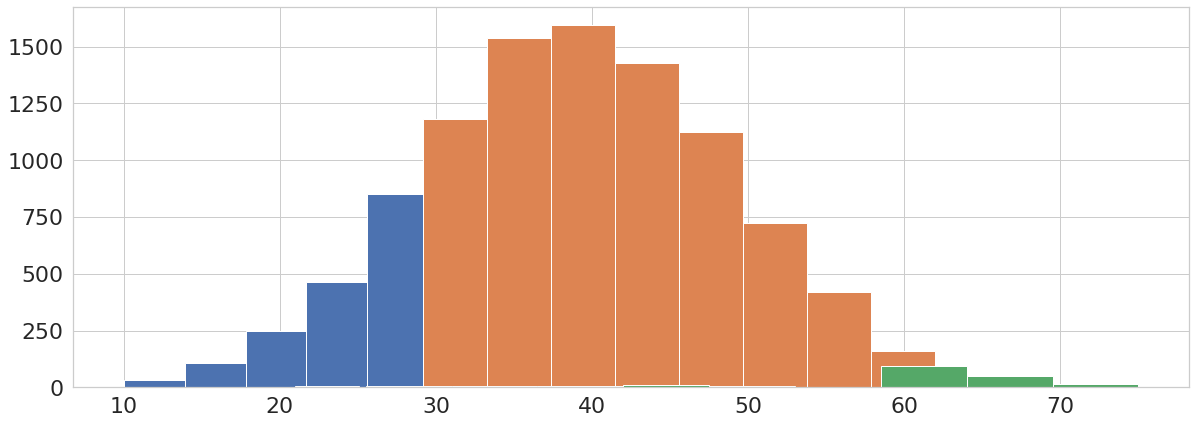

In [54]:
test.groupby('district').delivery_time.hist()

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

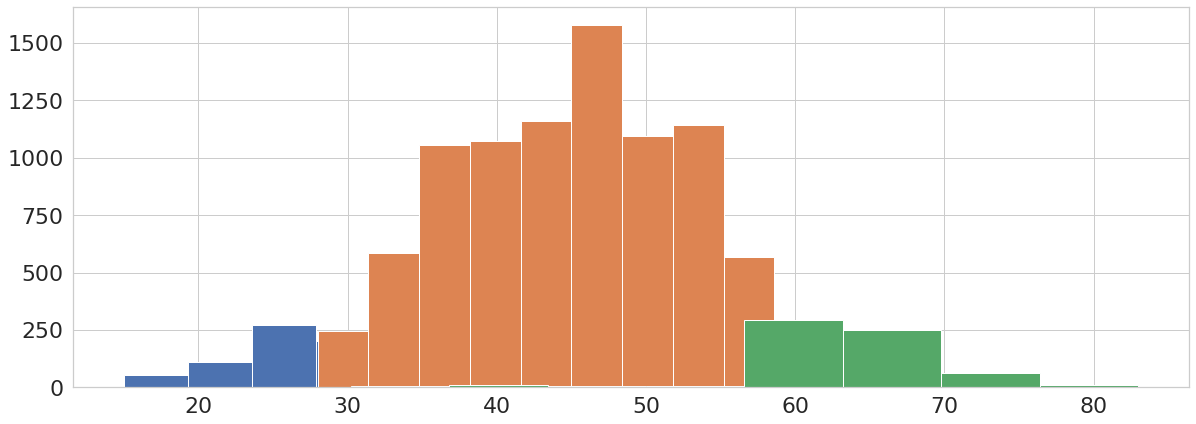

In [55]:
control.groupby('district').delivery_time.hist()

In [47]:
test

,order_id,delivery_time,district,experiment_group
10092,12494,38.0,Purlieus,test
10093,12136,31.0,Purlieus,test
10094,11987,39.0,Purlieus,test
10095,12848,29.0,Central,test
10096,13166,31.0,Purlieus,test
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


In [58]:
test.shape[0] - control.shape[0]

12

In [64]:
stats.shapiro(test.delivery_time.sample(1000, random_state=17))

(0.9975479245185852, 0.14013493061065674)

In [65]:
stats.shapiro(control.delivery_time.sample(1000, random_state=17))

(0.9974725842475891, 0.12411931157112122)

In [67]:
round(test.delivery_time.std(), 2)

9.88

In [68]:
round(control.delivery_time.std(), 2)

9.99

In [69]:
test.delivery_time.mean()

39.04681314330958

In [70]:
control.delivery_time.mean()

45.065101070154576

In [78]:
x1 = test.delivery_time.mean()
sd1 = test.delivery_time.std()
n1 = test.shape[0]
x2 = control.delivery_time.mean()
sd2 = control.delivery_time.std()
n2 = control.shape[0]

In [79]:
se = ((sd1*sd1) / n1 + (sd2*sd2) / n2) ** 0.5
se

0.13984456208334362

In [80]:
t = (x1 - x2) / se
t

-43.035552024241454

In [82]:
stats.ttest_ind(test.delivery_time, control.delivery_time)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

In [87]:
round(((x1-x2)/x2)*100, 2)

-13.35